# Corregir aberraciones cromáticas usando máscaras y HSV
## Mediante máscaras se detecta la aberración cromática y bajando la saturación se corrige

Objetivo: Corrección de aberraciones cromáticas.

Idea principal:
* Detección automática de la aberración mediante el uso de máscaras
* corrección mediante bajada de saturación de la imagen solo en las zonas indicadas por la máscara

Fuentes:
* https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html
* https://scikit-image.org/docs/dev/user_guide/getting_started.html
* https://stackoverflow.com/questions/26392336/importing-images-from-a-directory-python-to-list-or-dictionary
* https://stackoverflow.com/questions/2612361/convert-rgb-values-to-equivalent-hsv-values-using-python
* https://www.pyimagesearch.com/2015/03/02/convert-url-to-image-with-python-and-opencv/

Atajos:
* https://cheatography.com/jorgejuan007/cheat-sheets/jupyter-notebook-atajos-de-teclado/

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from skimage import data
from skimage.color import rgb2hsv
from skimage.color import hsv2rgb
import urllib
import cv2

In [147]:
# Función sacada de LM 3 para mostrar resultados
#
def imshow(img):
    fig, ax = plt.subplots(figsize=(11,11))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()


In [149]:
#El profesor introduce una de las fotos propuestas. Debemos asegurarnos de que las fotos 
#de muestra contenga aberracion, morada, azul, verde o amarilla.

#Para que funcione necesitamos tener las imágenes descargadas de 
#github en el almacenamiento interno

print("Introduzca el nombre de la foto que desee ver (peine, arbol, terraza o facultad). \n Para introducir una URL pulse la tecla ENTER. \n Se puede añadir una nueva imagen a la carpeta fotos y escribir el nombre del archivo sin su extensión.")
nombre_foto = input()


def url_to_image(url):
    # descargamos la imagen, la convertimos en un array NumPy, y leemos la imagen en formato OpenCV (BGR). 
    # Cambiamos la matriz de datos de la imagen a RGB para representarla con la librería plt sin intercambiar sus canales por defecto.
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image

if nombre_foto =='':
    print('Introduzca la URL de la foto en formato .PNG')
    URL = input()
    datos_foto= url_to_image(URL)  
        
    
  
    

Introduzca el nombre de la foto que desee ver (peine, arbol, terraza o facultad). 
 Para introducir una URL pulse la tecla ENTER. 
 Se puede añadir una nueva imagen a la carpeta fotos y escribir el nombre del archivo sin su extensión.

Introduzca la URL de la foto en formato .PNG
https://upload.wikimedia.org/wikipedia/commons/c/c1/Purple_fringing.jpg


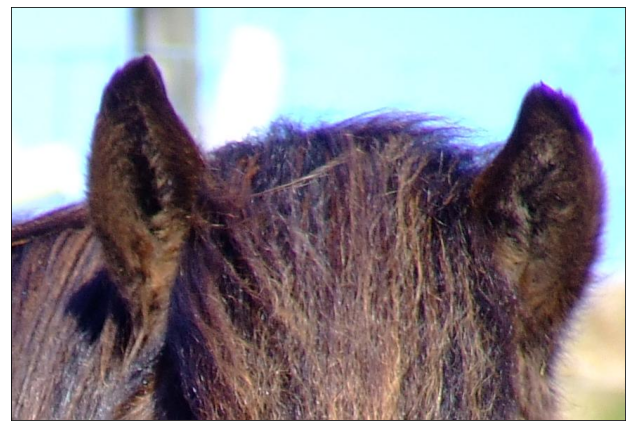

In [152]:
import os
#si nuestro archivo está en la carpeta local
if nombre_foto !='':
    data_dir = 'fotos/'
    foto = os.path.join(data_dir,  nombre_foto+'.png')
    from skimage import io
    datos_foto = io.imread(foto)
imshow(datos_foto)


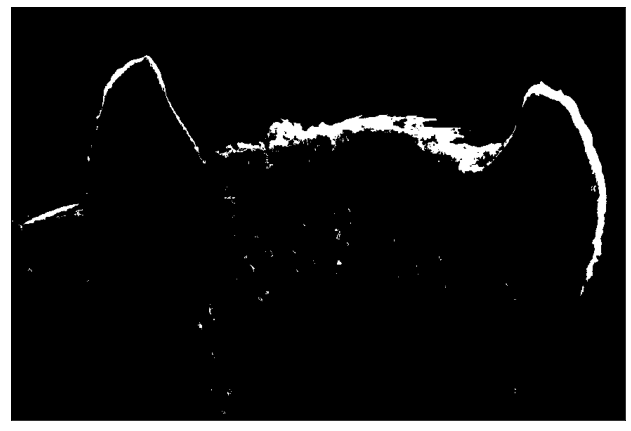

In [153]:
# meter explicación de Nico sobre cómo se han tomado los parámetros para la máscara, foto y fuente

import cv2
import csv
import numpy as np


def create_mask(foto):
    
    hsv = cv2.cvtColor(foto, cv2.COLOR_RGB2HSV)

    green_low = np.array([35, 100, 100])
    green_high = np.array([90, 255, 255])
    blue_low = np.array([110, 100, 100])
    blue_high = np.array([170, 255, 255])

    mask1 = cv2.inRange(hsv, green_low, green_high)
    mask2 = cv2.inRange(hsv, blue_low, blue_high)
    mask = cv2.add(mask1, mask2)
    return mask

imshow(create_mask(datos_foto))


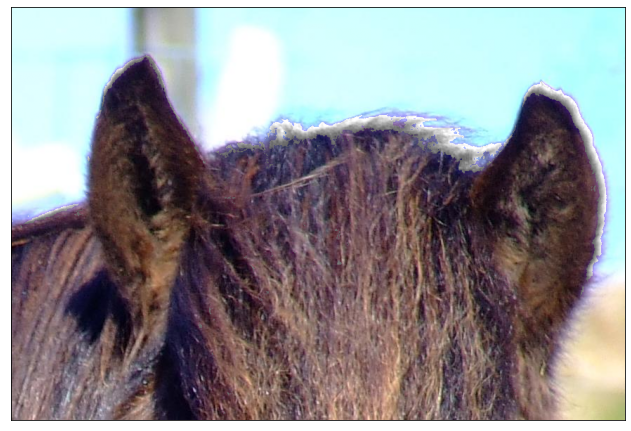

In [154]:
import pandas as pd
import os
from skimage import io
from numpy import genfromtxt

def fix_ab_cromatica(rgb_img):

    hsv_img = rgb2hsv(rgb_img)
    layer_shape = hsv_img[:,:,1].shape
    x_shape = layer_shape[0]
    y_shape = layer_shape[1]
    mascara = create_mask(datos_foto)
    for i in range(x_shape):
        for j in range(y_shape):
            if mascara[i][j] == 255:
                hsv_img[:,:,1][i][j] = 0
    rgb_img_fixed = hsv2rgb(hsv_img)
    return rgb_img_fixed

fixed_foto = fix_ab_cromatica(datos_foto)
imshow(fixed_foto)

In [ ]:
#hacemos una comparativa de los pasos hechos y el resultado obtenido¡
plt.figure(figsize=(17,12))

plt.subplot (131)
plt.axis('off')
plt.title('Imagen original')

plt.imshow(datos_foto)
plt.subplot (132)
plt.axis('off')
plt.title('Máscara')


plt.imshow(create_mask(datos_foto))
plt.subplot (133)
plt.imshow(fixed_foto)
plt.axis('off')
plt.title('Imagen corregida')

